<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

pd.set_option('display.max_columns', None)
#Display the top 5 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_9272\566442735.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette=colors)


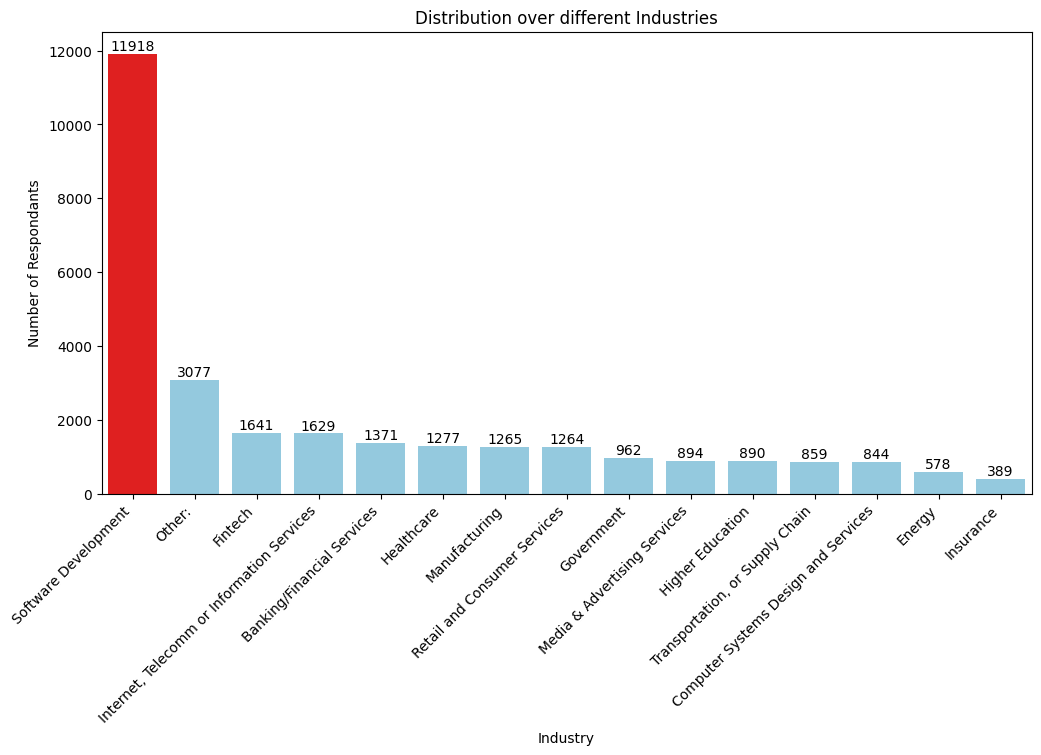

In [25]:
##Write your code here
industry_counts = df["Industry"].value_counts()

colors = ['skyblue' if count < industry_counts.max() else 'red' for count in industry_counts.values]

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette=colors)
plt.title("Distribution over different Industries")
plt.ylabel("Number of Respondants")
plt.xticks(rotation=45, ha='right')

# Annotate the bar
for index, value in enumerate(industry_counts):
    plt.text(x=index, y=value+100, s=str(value), ha='center')

plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [34]:
##Write your code here
df = df.dropna(subset=["ConvertedCompYearly"])

# Ensure 'ConvertedCompYearly' is numeric (to handle any non-numeric values)
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors='coerce')

mean_comp = df["ConvertedCompYearly"].mean()
median_comp = df["ConvertedCompYearly"].median()
std_comp = df["ConvertedCompYearly"].std()

print(f"Mean: {mean_comp:.3f}")
print(f"Median: {median_comp:.3f}")
print(f"Standard Deviation: {std_comp:.3f}")

# Threshold (mean + 3 * standard deviation)
threshold = mean_comp + (3*std_comp)

print(f"Threshold: {threshold:.3f}")

high_compensation = df[df["ConvertedCompYearly"] > threshold]
print(f"Number of Respondants who have compensation above threshold : {high_compensation.shape[0]}")

high_compensation.head()

Mean: 86155.287
Median: 65000.000
Standard Deviation: 186756.973
Threshold: 646426.207
Number of Respondants who have compensation above threshold : 89


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,10,"Developer, full-stack","10,000 or more employees",I have little or no influence,NaN,NaN,NaN,United States of America,USD\tUnited States dollar,650000.0,C#;HTML/CSS;PowerShell;SQL;TypeScript,C#;Kotlin;Rust;TypeScript,C#;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,ASP.NET;Node.js;React,ASP.NET CORE;Blazor;React,React,NaN,NaN,NaN,.NET (5+) ;.NET Framework (1.0 - 4.8),.NET (5+) ;Roslyn,.NET (5+),MSBuild;npm;NuGet;pnpm;Webpack,NaN,NaN,Notepad++;Rider;Visual Studio;WebStorm,Notepad++;Rider;WebStorm,Notepad++;Rider;WebStorm,Windows,Windows,Wikis,Wikis,Wikis,Microsoft Teams,NaN,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange,A few times per month or weekly,Yes,Less than once per month or monthly,Quickly finding code solutions;Learning new-to...,Neutral,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,10.0,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Disagree,Disagree,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,60-120 minutes a day,Amount of technical debt,Automated testing;Knowledge sharing community,Hybrid (on-prem and cloud),Internal Developer portal,Software Development,0.0,0.0,0.0,40.0,20.0,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,30,15,"Senior Executive (C-Suite, VP, etc.)","10,000 or more employees",I have a great deal of influence,Start a free trial;Ask developers I know/work ...,Is set up to be customized and needs to be eng...,APIs;Quality support system;Reputation for qua...,United States of America,USD\tUnited States dollar,1000000.0,Cobol;Java;JavaScript;Python;SQL,

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [36]:
##Write your code here
# Q1 (25th percentile) and Q3 (75th percentile)
q1 = df["ConvertedCompYearly"].quantile(0.25)
q3 = df["ConvertedCompYearly"].quantile(0.75)

# InterQuartile Range
IQR = q3-q1

# Outlier bounds
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Outliers
outlier = df[(df["ConvertedCompYearly"] < lower_bound) | (df["ConvertedCompYearly"] > upper_bound)]


print(f"Q1 : {q1:.3f}")
print(f"Q3 : {q3:.3f}")
print(f"IQR : {IQR:.3f}")
print(f"Lower bound : {lower_bound:.3f}")
print(f"Upper bound : {upper_bound:.3f}")
print(f"Number of outliers : {outlier.shape[0]}")
print(f"Percentage of Outliers : {(len(outlier) / len(df))*100:.3f}%")


Q1 : 32712.000
Q3 : 107971.500
IQR : 75259.500
Lower bound : -80177.250
Upper bound : 220860.750
Number of outliers : 978
Percentage of Outliers : 4.173%


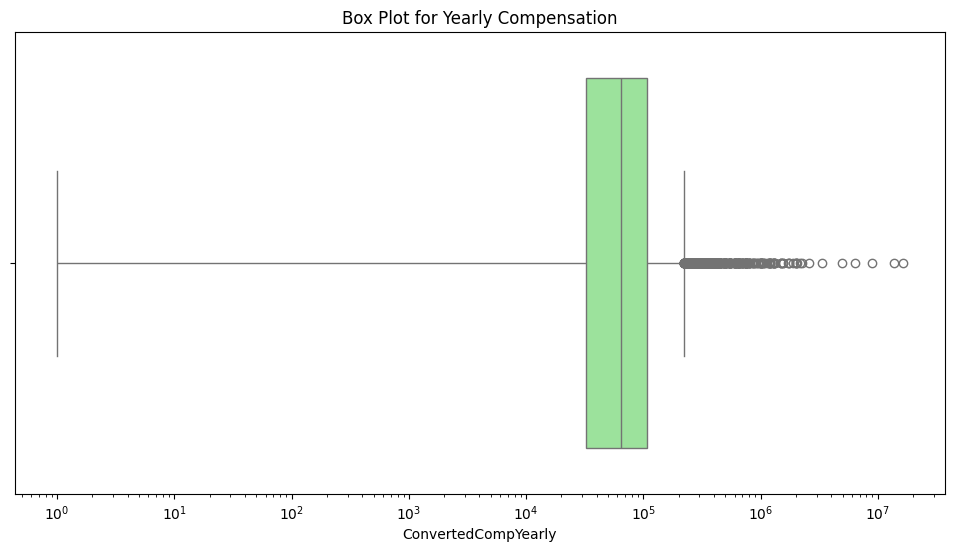

In [38]:
# Box plot
plt.figure(figsize=(12,6))
sns.boxplot(x=df["ConvertedCompYearly"], color='lightgreen')
plt.title("Box Plot for Yearly Compensation")
plt.xscale('log')

plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [39]:
##Write your code here
df_no_outliers = df[(df["ConvertedCompYearly"]>=lower_bound) & (df["ConvertedCompYearly"]<=upper_bound)]

print(f"Size of dataframe with outliers: {df.shape[0]}")
print(f"Size of dataframe without outliers: {df_no_outliers.shape[0]}")

Size of dataframe with outliers: 23435
Size of dataframe without outliers: 22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [41]:
##Write your code here
import numpy as np
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               'Prefer not to say': np.nan  # Can drop or impute
               }

df["Age_mapped"] = df["Age"].map(age_mapping)

# Drop NULL values
df = df.dropna(subset=['Age_mapped'])

# Select Numeric columns
numeric_columns = df.select_dtypes(include= 'number').columns

# Correlation Matrix
correlation = df[numeric_columns].corr()
correlation

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,Age_mapped
ResponseId,1.000000,0.001337,-0.039029,0.014147,0.001708,0.006892,0.007727,0.019049,0.005811,0.020688,0.012480,0.011555,-0.008429,-0.016945,-0.042155
CompTotal,0.001337,1.000000,-0.004873,0.025222,0.006607,0.017027,0.019908,0.033180,0.019586,0.002964,0.007569,0.022403,0.080464,0.008930,-0.003802
WorkExp,-0.039029,-0.004873,1.000000,-0.028909,-0.058290,-0.096604,-0.066255,-0.102631,-0.049174,-0.091768,-0.110707,-0.103993,0.154188,0.096564,0.847179
JobSatPoints_1,0.014147,0.025222,-0.028909,1.000000,0.426053,0.629117,0.609603,0.592006,0.614648,0.589280,0.579558,0.607641,0.020359,0.092516,-0.036062
JobSatPoints_4,0.001708,0.006607,-0.058290,0.426053,1.000000,0.506627,0.422964,0.436170,0.414333,0.457521,0.478806,0.502589,0.018075,0.031634,-0.071557
JobSatPoints_5,0.006892,0.017027,-0.096604,0.629117,0.506627,1.000000,0.603598,0.597868,0.621888,0.615290,0.634530,0.687610,-0.023294,0.052232,-0.098925
JobSatPoints_6,0.007727,0.019908,-0.066255,0.609603,0.422964,0.603598,1.000000,0.668138,0.624239,0.620758,0.581321,0.593149,-0.008561,0.040849,-0.054015
JobSatPoints_7,0.019049,0.033180,-0.102631,0.592006,0.436170,0.597868,0.668138,1.000000,0.679024,0.648870,0.637580,0.609876,-0.036413,0.037634,-0.088052
JobSatPoints_8,0.005811,0.019586,-0.049174,0.614648,0.414333,0.621888,0.624239,0.679024,1.000000,0.640289,0.609919,0.611971,-0.011083,0.059389,-0.052436
JobSatPoints_9,0.020688,0.002964,-0.091768,0.589280,0.457521,0.615290,0.620758,0.648870,0.640289,1.000000,0.650143,0.637647,-0.015835,0.043854,-0.087118


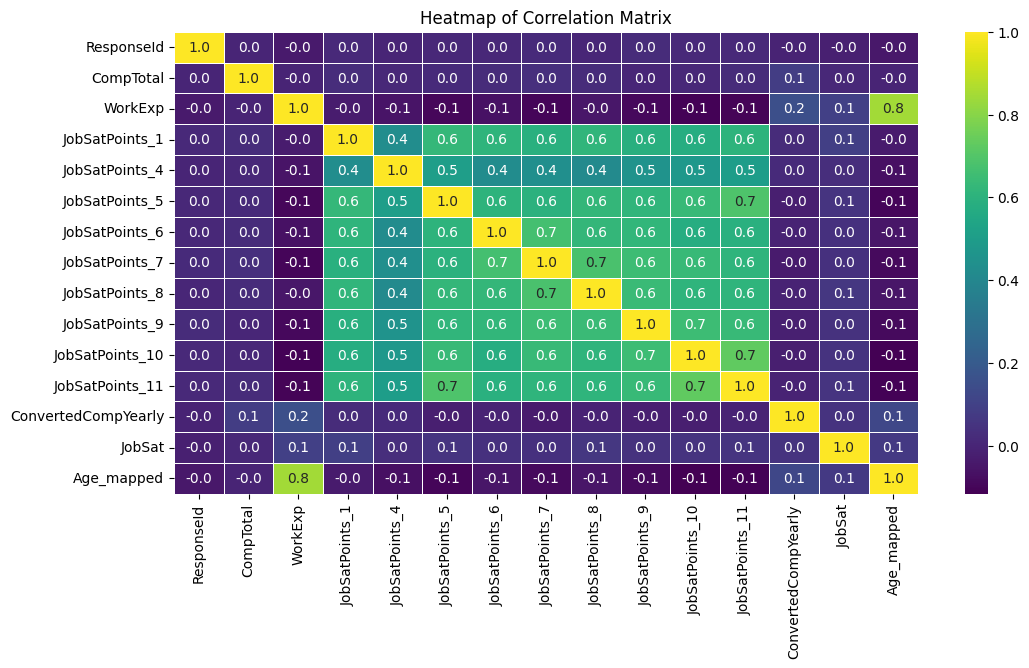

In [44]:
# Visulaizing correlation matrix using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation, cmap='viridis', annot=True, fmt='.1f', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
